# 2.5.2: The Coffee Cooling Problems

In [8]:
import pandas as pd
import numpy as np

def make_system(T_init, volume, r, t_end, T_env):
    return dict(T_init=T_init, T_final=T_init, volume=volume,
                  r=r, t_end=t_end, T_env=T_env,
                  t_0=0, dt=1)

def change_func(t, T, system):
    r, T_env, dt = system['r'], system['T_env'], system['dt'] 
    dT = -r * (T - T_env) * dt   
    return dT

def run_simulation(system, change_func):
    t_array = np.arange(system['t_0'], system['t_end']+1, system['dt'])
    n = len(t_array)
    
    results = pd.Series(index=t_array,dtype=object)
    results.iloc[0] = system['T_init']
    
    for i in range(n-1):
        t = t_array[i]
        T = results.iloc[i]
        results.iloc[i+1] = T + change_func(t, T, system)
    
    system['T_final'] = results.iloc[-1]
    return results
    
def mix(system1, system2):
    
    V1, V2 = system1['volume'], system2['volume']
    T1, T2 = system1['T_final'], system2['T_final']
    
    V_mix = V1 + V2
    T_mix = (V1 * T1 + V2 * T2) / V_mix

    new_system = make_system(T_mix, V_mix, system1['r'], 30, 22)
    
    return new_system

def run_and_mix(t_add, t_total, fluid1, fluid2):
    fluid1['t_end'] = t_add
    fluid1_results = run_simulation(fluid1, change_func)
    
    fluid2['t_end'] = t_add
    fluid2_results = run_simulation(fluid2, change_func)
    
    mixture = mix(fluid1, fluid2)
    mixture['t_end'] = t_total - t_add
    results = run_simulation(mixture, change_func)

    return mixture['T_final']

def sweep_mixing_time(fluid1, fluid2):
    sweep = pd.Series([],dtype=object)
    t_end = fluid1['t_end']
    for t_add in np.linspace(0, t_end, 11):
        sweep[t_add] = run_and_mix(t_add, t_end, fluid1, fluid2)
        sweep.plot(label='mixture', color='C2', xlabel='Time until mixing (minutes)',
                ylabel='Final emperature (C)', title='Final temp as function of time milk added');

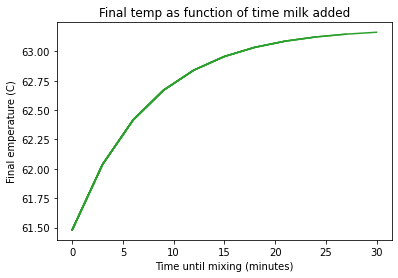

In [9]:
# Runtime Code
TC = 90.0; volC = 300.0; rC = 0.0115;
TM = 5.0; volM = 50.0; rM = 0.133; 
t_end= 30; T_env=22
coffee = make_system(TC, volC, rC, t_end, T_env)
milk = make_system(TM, volM, rM, t_end, T_env)

sweep_mixing_time(coffee, milk)